In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [194]:
data=pd.read_csv('aapl.csv')
apple=pd.DataFrame(data)
print(apple.head(5))
print(apple.describe())
print(apple.info())

         Date    Open    High     Low   Close    Volume  Adj Close
0  2008-10-14  116.26  116.40  103.14  104.08  70749800     104.08
1  2008-10-13  104.55  110.53  101.02  110.26  54967000     110.26
2  2008-10-10   85.70  100.00   85.00   96.80  79260700      96.80
3  2008-10-09   93.35   95.80   86.60   88.74  57763700      88.74
4  2008-10-08   85.91   96.33   85.68   89.79  78847900      89.79
              Open         High          Low        Close        Volume  \
count  6081.000000  6081.000000  6081.000000  6081.000000  6.081000e+03   
mean     46.823511    47.681506    45.913595    46.798619  1.363986e+07   
std      33.993517    34.578077    33.273106    33.947235  1.352107e+07   
min      12.880000    13.190000    12.720000    12.940000  8.880000e+04   
25%      24.730000    25.010000    24.200000    24.690000  5.530000e+06   
50%      38.250000    38.880000    37.460000    38.130000  8.976400e+06   
75%      53.500000    54.550000    52.500000    53.610000  1.631920e+07  

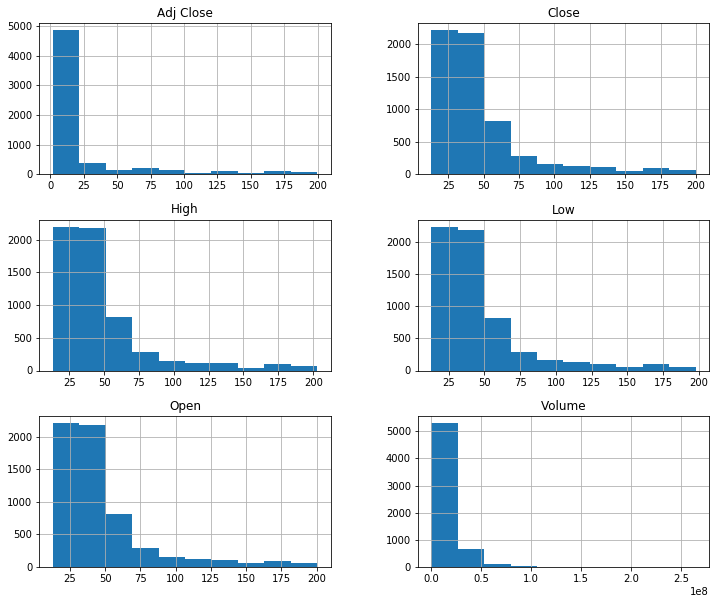

In [195]:
'''fig,ax=plt.subplots()

ax.plot(apple['Open'],apple['High'],color='green',marker='.')
ax.plot(apple.Open,apple.Low,color='red',marker='.')
ax.plot(apple.Open,apple.Close,color='black',marker='.')

#ax.plot(apple.Date,apple.High,color='blue')
#ax.plot(apple.Date,apple.Low,color='black')
plt.show()'''
apple.hist(figsize=(12,10))
plt.show()

# TIME STAMP

In [196]:
## EXAMPLE

from datetime import datetime
date=[]
for x in apple['Date']:
    a=pd.Timestamp(x)
    date=np.append(date,a)
date

dates=pd.Timestamp('1991-12-28')
dates.weekday_name

## PERIODS

period=pd.Period(datetime(1991,12,28),'M')
period
period1=period.asfreq('D')
period1+365


Period('1992-12-30', 'D')

In [197]:
## REPLACING STRING DATE WITH TIMESTAMP

from datetime import datetime
date=[]
for x in apple['Date']:
    a=pd.Timestamp(x)
    date=np.append(date,a)
date
temp=pd.DataFrame({'Date':date})
apple['Date']=temp['Date']
apple.info()

## OR DATETIME

apple.Date=pd.to_datetime(apple.Date)
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6081 entries, 0 to 6080
Data columns (total 7 columns):
Date         6081 non-null datetime64[ns]
Open         6081 non-null float64
High         6081 non-null float64
Low          6081 non-null float64
Close        6081 non-null float64
Volume       6081 non-null int64
Adj Close    6081 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 332.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6081 entries, 0 to 6080
Data columns (total 7 columns):
Date         6081 non-null datetime64[ns]
Open         6081 non-null float64
High         6081 non-null float64
Low          6081 non-null float64
Close        6081 non-null float64
Volume       6081 non-null int64
Adj Close    6081 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 332.6 KB


In [198]:
## SETTING DATE INDEX

apple.set_index('Date',inplace=True)
apple.info()
apple.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6081 entries, 2008-10-14 to 1984-09-07
Data columns (total 6 columns):
Open         6081 non-null float64
High         6081 non-null float64
Low          6081 non-null float64
Close        6081 non-null float64
Volume       6081 non-null int64
Adj Close    6081 non-null float64
dtypes: float64(5), int64(1)
memory usage: 332.6 KB


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79


In [239]:
apple['Adj Close'].plot(title='Closing price')
plt.tight_layout()
#plt.show()
apple['%change']=apple['Adj Close'].pct_change().mul(100)
apple.head()

,Open,High,Low,Close,Volume,Adj Close,shifted,%change
Date,,,,,,,,
2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08,NaN,NaN
2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26,116.26,5.937740
2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80,104.55,-12.207510
2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74,85.70,-8.326446
2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79,93.35,1.183232


In [203]:
## SUBSET OF DATE METHODS

apple['2000'].info()
apple['2000-10':'2000-08'].info()
#apple.loc['2005-10','High']

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2000-12-29 to 2000-01-03
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65 entries, 2000-10-31 to 2000-08-01
Data columns (total 6 columns):
Open         65 non-null float64
High         65 non-null float64
Low          65 non-null float64
Close        65 non-null float64
Volume       65 non-null int64
Adj Close    65 non-null float64
dtypes: float64(5), int64(1)
memory usage: 3.6 KB


In [247]:
## Another file, apple only used here to show another parse method

data=pd.read_csv('aapl.csv')
apple1=pd.DataFrame(data)
apple1.info()
apple1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6081 entries, 0 to 6080
Data columns (total 7 columns):
Date         6081 non-null object
Open         6081 non-null float64
High         6081 non-null float64
Low          6081 non-null float64
Close        6081 non-null float64
Volume       6081 non-null int64
Adj Close    6081 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 332.6+ KB


,Date,Open,High,Low,Close,Volume,Adj Close
0,2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
1,2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2,2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
3,2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
4,2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79


# DATE TIME PARSE INDEXING

In [286]:
apple1=pd.read_csv('aapl.csv',parse_dates=['Date'],index_col='Date')
apple1.info()
apple1.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6081 entries, 2008-10-14 to 1984-09-07
Data columns (total 6 columns):
Open         6081 non-null float64
High         6081 non-null float64
Low          6081 non-null float64
Close        6081 non-null float64
Volume       6081 non-null int64
Adj Close    6081 non-null float64
dtypes: float64(5), int64(1)
memory usage: 332.6 KB


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79


# DATA ANALYSIS

In [431]:
## Shifting time

apple1['shifted']=apple1.Open.shift()
apple1.head()
apple1['lagged']=apple1.shifted.shift(periods=-1)
apple1.head()

,Open,High,Low,Close,Volume,Adj Close,normalized,shifted,lagged
Date,,,,,,,,,
2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08,1.000000,NaN,116.26
2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26,1.059377,116.26,104.55
2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80,0.930054,104.55,85.70
2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74,0.852613,85.70,93.35
2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79,0.862702,93.35,85.91


In [432]:
apple1['change']=apple1.Open.div(apple1.shifted)   #div open by shifted to calc rate of change
apple1.head()

,Open,High,Low,Close,Volume,Adj Close,normalized,shifted,lagged,change
Date,,,,,,,,,,
2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08,1.000000,NaN,116.26,NaN
2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26,1.059377,116.26,104.55,0.899277
2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80,0.930054,104.55,85.70,0.819703
2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74,0.852613,85.70,93.35,1.089265
2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79,0.862702,93.35,85.91,0.920300


In [433]:
apple1['return']=apple1.change.sub(1).mul(100)   #rate of return = xt/x - 1*100
apple1.head()

,Open,High,Low,Close,Volume,Adj Close,normalized,shifted,lagged,change,return
Date,,,,,,,,,,,
2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08,1.000000,NaN,116.26,NaN,NaN
2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26,1.059377,116.26,104.55,0.899277,-10.072252
2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80,0.930054,104.55,85.70,0.819703,-18.029651
2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74,0.852613,85.70,93.35,1.089265,8.926488
2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79,0.862702,93.35,85.91,0.920300,-7.970005


In [434]:
apple1['Diff']=apple1.Open.diff()
apple1['Return']=apple1.Diff.div(apple1.shifted).mul(100)
apple1.head()

,Open,High,Low,Close,Volume,Adj Close,normalized,shifted,lagged,change,return,Diff,Return
Date,,,,,,,,,,,,,
2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08,1.000000,NaN,116.26,NaN,NaN,NaN,NaN
2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26,1.059377,116.26,104.55,0.899277,-10.072252,-11.71,-10.072252
2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80,0.930054,104.55,85.70,0.819703,-18.029651,-18.85,-18.029651
2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74,0.852613,85.70,93.35,1.089265,8.926488,7.65,8.926488
2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79,0.862702,93.35,85.91,0.920300,-7.970005,-7.44,-7.970005


In [435]:
apple1['monthly return']=apple1['Adj Close'].pct_change(30).mul(100)
apple1.head()

,Open,High,Low,Close,Volume,Adj Close,normalized,shifted,lagged,change,return,Diff,Return,monthly return
Date,,,,,,,,,,,,,,
2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08,1.000000,NaN,116.26,NaN,NaN,NaN,NaN,NaN
2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26,1.059377,116.26,104.55,0.899277,-10.072252,-11.71,-10.072252,NaN
2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80,0.930054,104.55,85.70,0.819703,-18.029651,-18.85,-18.029651,NaN
2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74,0.852613,85.70,93.35,1.089265,8.926488,7.65,8.926488,NaN
2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79,0.862702,93.35,85.91,0.920300,-7.970005,-7.44,-7.970005,NaN


In [436]:
apple1['annual return']=apple1['Adj Close'].pct_change(360).mul(100)
apple1.head()

,Open,High,Low,Close,Volume,Adj Close,normalized,shifted,lagged,change,return,Diff,Return,monthly return,annual return
Date,,,,,,,,,,,,,,,
2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08,1.000000,NaN,116.26,NaN,NaN,NaN,NaN,NaN,NaN
2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26,1.059377,116.26,104.55,0.899277,-10.072252,-11.71,-10.072252,NaN,NaN
2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80,0.930054,104.55,85.70,0.819703,-18.029651,-18.85,-18.029651,NaN,NaN
2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74,0.852613,85.70,93.35,1.089265,8.926488,7.65,8.926488,NaN,NaN
2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79,0.862702,93.35,85.91,0.920300,-7.970005,-7.44,-7.970005,NaN,NaN


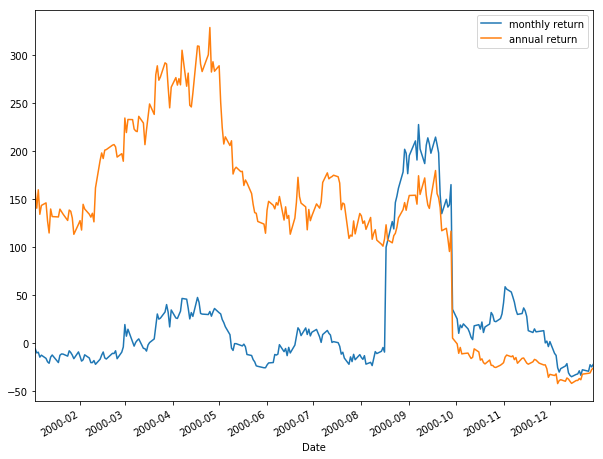

In [437]:
#apple1['2000':'2004'].info()
#a1.head()

#apple1['2000'].info()
#apple1['2000':'2001'].info()
apple1.loc['2000',['monthly return','annual return']].plot(figsize=(10,8))
plt.show()

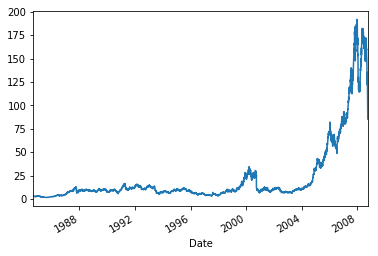

,Open,High,Low,Close,Volume,Adj Close,normalized,shifted,lagged,change,return,Diff,Return,monthly return,annual return
Date,,,,,,,,,,,,,,,
2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08,1.000000,NaN,116.26,NaN,NaN,NaN,NaN,NaN,NaN
2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26,1.059377,116.26,104.55,0.899277,-10.072252,-11.71,-10.072252,NaN,NaN
2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80,0.930054,104.55,85.70,0.819703,-18.029651,-18.85,-18.029651,NaN,NaN
2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74,0.852613,85.70,93.35,1.089265,8.926488,7.65,8.926488,NaN,NaN
2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79,0.862702,93.35,85.91,0.920300,-7.970005,-7.44,-7.970005,NaN,NaN


In [466]:
## comparison

apple1.head()
firstprice=apple1['Adj Close'].iloc[0]
normalized=apple1['Adj Close'].div(firstprice).mul(100)
apple1['normalized']=apple1['Adj Close'].div(firstprice)
ax=normalized.plot()
plt.show()
apple1.head()

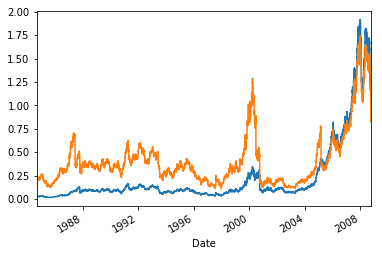

In [464]:
apple1.iloc[0]
n=apple1.div(apple1.iloc[0])
n.head()
ax=n['Adj Close'].plot(label='AC')  #using ax to plot multiple in 1 graph
#plt.show()
n['High'].plot(ax=ax,label='high')
plt.show()

# TIME PERIOD FREQ

In [316]:
## create data series with freq

dates=pd.date_range(start='2000',periods=4,freq='Q')
qr=pd.Series(data=np.abs(np.random.randn(4)),index=dates)
qr

2000-03-31    0.093797
2000-06-30    2.080593
2000-09-30    0.605463
2000-12-31    2.329538
Freq: Q-DEC, dtype: float64

In [332]:
mn=qr.asfreq('M')   #change freq
mn=mn.to_frame('baseline')
mn['fvalue']=qr.asfreq('M',method='ffill')
mn['bvalue']=qr.asfreq('M',method='bfill')
mn

,baseline,fvalue,bvalue
2000-03-31,0.093797,0.093797,0.093797
2000-04-30,NaN,0.093797,2.080593
2000-05-31,NaN,0.093797,2.080593
2000-06-30,2.080593,2.080593,2.080593
2000-07-31,NaN,2.080593,0.605463
2000-08-31,NaN,2.080593,0.605463
2000-09-30,0.605463,0.605463,0.605463
2000-10-31,NaN,0.605463,2.329538
2000-11-30,NaN,0.605463,2.329538
2000-12-31,2.329538,2.329538,2.329538


In [322]:
qr1=mn.asfreq('A')
qr1

2000-12-31    2.329538
Freq: A-DEC, dtype: float64

In [337]:
dates=pd.date_range(start='2000',periods=12,freq='M')
dates

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31', '2000-11-30', '2000-12-31'],
              dtype='datetime64[ns]', freq='M')

In [338]:
qr.reindex(dates)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.093797
2000-04-30         NaN
2000-05-31         NaN
2000-06-30    2.080593
2000-07-31         NaN
2000-08-31         NaN
2000-09-30    0.605463
2000-10-31         NaN
2000-11-30         NaN
2000-12-31    2.329538
Freq: M, dtype: float64

# UPSAMPLING - Interpolate

In [439]:
## RESAMPLE and INTERPOLATE

dates=pd.date_range(start='2000',periods=2,freq='AS')  #AS - annual start
ex=pd.Series(data=(np.random.randn(2)),index=dates)
ex

2000-01-01    1.270590
2001-01-01   -1.461073
Freq: AS-JAN, dtype: float64

In [440]:
ex=ex.to_frame('x').info()
ex.asfreq('QS').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2 entries, 2000-01-01 to 2001-01-01
Freq: AS-JAN
Data columns (total 1 columns):
x    2 non-null float64
dtypes: float64(1)
memory usage: 112.0 bytes


In [373]:
ex.resample('QS').info()  #same result as as.freq

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2000-01-01 to 2001-01-01
Freq: QS-JAN
Data columns (total 1 columns):
x    2 non-null float64
dtypes: float64(1)
memory usage: 80.0 bytes


C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called info(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.


In [417]:
data=pd.Series(data=[1,2,3],index=pd.date_range(start='2000-01-01',periods=3,freq='AS'))
data

2000-01-01    1
2001-01-01    2
2002-01-01    3
Freq: AS-JAN, dtype: int64

In [427]:
afill=data.resample('QS').ffill()
afill

2000-01-01    1
2000-04-01    1
2000-07-01    1
2000-10-01    1
2001-01-01    2
2001-04-01    2
2001-07-01    2
2001-10-01    2
2002-01-01    3
Freq: QS-JAN, dtype: int64

In [425]:
ainter=data.resample('QS').interpolate()
ainter

2000-01-01    1.00
2000-04-01    1.25
2000-07-01    1.50
2000-10-01    1.75
2001-01-01    2.00
2001-04-01    2.25
2001-07-01    2.50
2001-10-01    2.75
2002-01-01    3.00
Freq: QS-JAN, dtype: float64

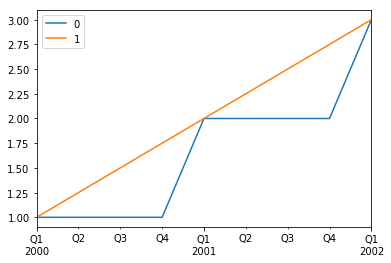

In [429]:
pd.concat([afill,ainter],axis=1).plot()
plt.show()

# DOWNSAMPLE - Aggregate

In [438]:
afill

2000-01-01    1
2000-04-01    1
2000-07-01    1
2000-10-01    1
2001-01-01    2
2001-04-01    2
2001-07-01    2
2001-10-01    2
2002-01-01    3
Freq: QS-JAN, dtype: int64

In [442]:
afill.resample('AS').mean().head()

2000-01-01    1
2001-01-01    2
2002-01-01    3
Freq: AS-JAN, dtype: int64

In [450]:
aa=afill.resample('A').agg(['mean','std'])
aa

,mean,std
2000-12-31,1,0.0
2001-12-31,2,0.0
2002-12-31,3,NaN


In [451]:
aa.loc['2001']

,mean,std
2001-12-31,2,0.0


In [467]:
## RESAMPLING MULTIPLE TS

data=pd.read_csv('aapl.csv',parse_dates=['Date'],index_col='Date')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6081 entries, 2008-10-14 to 1984-09-07
Data columns (total 6 columns):
Open         6081 non-null float64
High         6081 non-null float64
Low          6081 non-null float64
Close        6081 non-null float64
Volume       6081 non-null int64
Adj Close    6081 non-null float64
dtypes: float64(5), int64(1)
memory usage: 332.6 KB


In [472]:
data.resample('Q').asfreq().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 98 entries, 1984-09-30 to 2008-12-31
Freq: Q-DEC
Data columns (total 6 columns):
Open         68 non-null float64
High         68 non-null float64
Low          68 non-null float64
Close        68 non-null float64
Volume       68 non-null float64
Adj Close    68 non-null float64
dtypes: float64(6)
memory usage: 5.4 KB


In [484]:
data.resample('BM').first().head()  #resample by aggregating monthly with first value for each month

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1984-09-28,26.50,26.87,26.25,26.50,2981600,3.02
1984-10-31,25.00,25.00,24.50,24.50,3521600,2.80
1984-11-30,25.00,25.25,25.00,25.00,1680000,2.85
1984-12-31,24.75,24.87,24.37,24.37,3533600,2.78
1985-01-31,29.12,29.12,27.87,27.87,6272800,3.18


# ROLLING FUNCTIONS

In [516]:
## Rolling mean

data=pd.Series(data=np.arange(1,11),index=pd.date_range(start='2000-01-01',periods=10))
data=data.to_frame('x')
date=pd.date_range(start='2000-01-01',periods=10)
data['weekday']=date.weekday_name
data

,x,weekday
2000-01-01,1,Saturday
2000-01-02,2,Sunday
2000-01-03,3,Monday
2000-01-04,4,Tuesday
2000-01-05,5,Wednesday
2000-01-06,6,Thursday
2000-01-07,7,Friday
2000-01-08,8,Saturday
2000-01-09,9,Sunday
2000-01-10,10,Monday


In [520]:
# fixed integer window taking into consideration last window no. of observations

data.rolling(window=3).mean()

,x,weekday
2000-01-01,NaN,Saturday
2000-01-02,NaN,Sunday
2000-01-03,2.0,Monday
2000-01-04,3.0,Tuesday
2000-01-05,4.0,Wednesday
2000-01-06,5.0,Thursday
2000-01-07,6.0,Friday
2000-01-08,7.0,Saturday
2000-01-09,8.0,Sunday
2000-01-10,9.0,Monday


In [529]:
# offset-based window based on fixed period length and varying no of obs

rd=data.rolling(window='3D').mean()

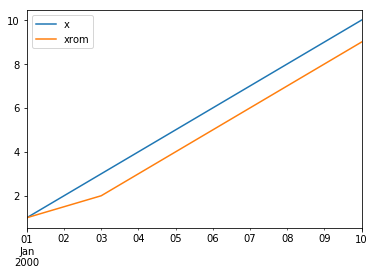

In [534]:
#data.join(rd.add_suffix('rom')).plot()
#plt.show()

#or
pd.concat([data,rd.add_suffix('rom')],axis=1).plot()
plt.show()

In [539]:
data=pd.Series(data=[1,2,3,4,5,6,7,8,9,10],index=pd.date_range(start='2000-01-01',periods=10))
rolling=data.rolling(window='2D')

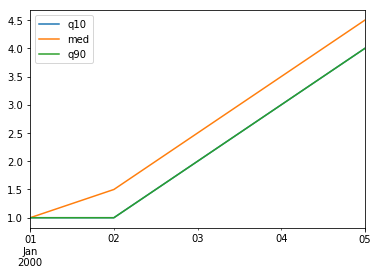

In [549]:
# forming different frames and joining

q10=rolling.quantile(.1).to_frame('q10')
qmed=rolling.median().to_frame('med')
q90=rolling.quantile(.9).to_frame('q90')
a=pd.concat([q10,qmed,q90],axis=1).head()
a.plot()
plt.show()

# return

RATE OF RETURN : 
single period return, r1 =(xt/xt-1)-1
multi period return, r = (1+r1)(1+r2)..(1+rn)-1

 calculate pct_change to get rate of return then add(1). then calc cumprod() and then sub(1) to get final r

data.expanding().max() to get running max
similarly running min. this gives overall min and max values

# RANDOM WALK

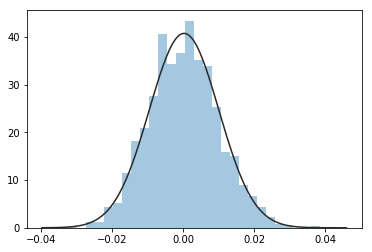

In [633]:
from numpy.random import normal,seed
import seaborn
from scipy.stats import norm
seed(42)
random_returns= normal(loc=0,scale=0.01,size=1000)
seaborn.distplot(random_returns,fit=norm,kde=False)
plt.show()

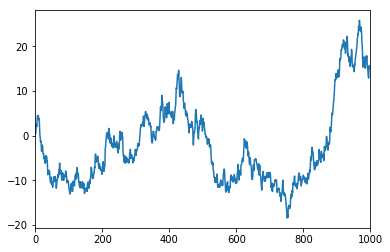

In [634]:
# CREATE A RANDOM PRICE PATH

return_series=pd.Series(random_returns)
random_prices=return_series.add(1).cumprod().sub(1)
random_prices.mul(100).plot()
plt.show()

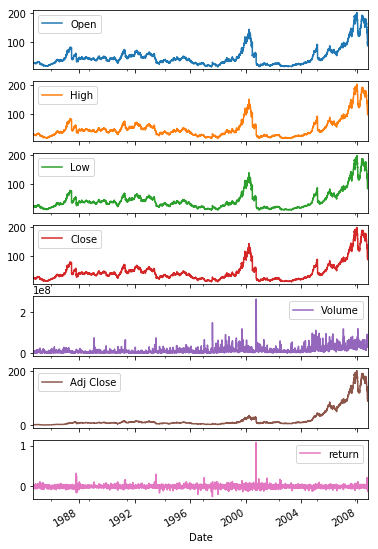

In [2]:
data=pd.read_csv('aapl.csv',parse_dates=['Date'],index_col='Date')
data['return']=data['Adj Close'].pct_change()
data.plot(subplots=True,figsize=(6,10))
plt.show()

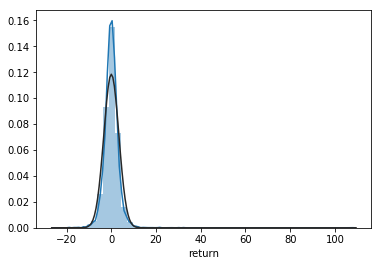

In [636]:
seaborn.distplot(data['return'].dropna().mul(100),fit=norm)
plt.show()    #the dist of return is not quite normal

In [637]:
#  sample return samples
from numpy.random import choice
sample=data['Adj Close'].dropna()
n= sample.count()
random_walk=choice(samples,size=n)
random_walk=pd.Series(random_walk,index=sample.index)
random_walk.head()

Date
2008-10-14     43.74
2008-10-13     83.94
2008-10-10      7.70
2008-10-09     11.03
2008-10-08    138.10
dtype: float64

In [8]:
# IDENTIFY SAMPLING FREQUENCY
data.set_freq('None')
data.inferred_freq()

AttributeError: 'DataFrame' object has no attribute 'set_freq'